# Diagnosis EDA & Wrangling

This notebook focuses in the exploratory data analysis of the patient's demographic features.

**Findings & Accomplishments:** 

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import rcParams
from scipy import stats

**Set Matplot Lib & Seaborn Styles** 

In [2]:
#Set Graphs style

rcParams['figure.figsize'] = 10, 10

sns.set(style='darkgrid')

sns.set_style({"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context("notebook", font_scale=1.2)

## Upload Random Sampled Data

Upload diagnosis columns from the random sample created from the AIH 2015 - 2018 files.

In [3]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')


# Patient demographic columns 

diag = ['ANO_CMPT','MES_CMPT','DIAG_PRINC','DIAG_SECUN']


diag_data = pd.read_csv(AIH_sample_path, 
                        encoding = 'UTF-8', 
                        na_values= ['NaN',' ',''],
                        usecols = diag)

CPU times: user 53 s, sys: 4.86 s, total: 57.8 s
Wall time: 58.9 s


In [4]:
diag_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16614830 entries, 0 to 16614829
Data columns (total 4 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
DIAG_PRINC    16614830 non-null object
DIAG_SECUN    16614830 non-null int64
dtypes: int64(3), object(1)
memory usage: 507.0+ MB


In [5]:
diag_data.head()

,ANO_CMPT,MES_CMPT,DIAG_PRINC,DIAG_SECUN
0,2015,8,O623,0
1,2015,8,P599,0
2,2015,10,O800,0
3,2015,3,S524,0
4,2015,12,L989,0


Upload diagnosis codes (CID-10) information. The CID-10 is an standard diagnostic codebook. It is divided by chapers, groups, categories and subcategories of diagnosis.

In [6]:
CID10_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/CID10CSV/CID10_clean.xlsx')

CID10_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/References/CID10CSV/CID10_clean.xlsx')


CID10_CAT = pd.read_excel(CID10_path, sheet_name = 'CAT')

CID10_SUBCAT = pd.read_excel(CID10_path, sheet_name = 'SUB_CAT')

In [7]:
print(CID10_CAT.info())

CID10_CAT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 5 columns):
CAP        2045 non-null int64
DES_CAP    2045 non-null object
DES_GRP    2043 non-null object
CAT        2045 non-null object
DES_CAT    2045 non-null object
dtypes: int64(1), object(4)
memory usage: 80.0+ KB
None


,CAP,DES_CAP,DES_GRP,CAT,DES_CAT
0,1,Capítulo I - Algumas doenças infecciosas e par...,Doenças infecciosas intestinais,A00,Cólera
1,1,Capítulo I - Algumas doenças infecciosas e par...,Doenças infecciosas intestinais,A01,Febres tifóide e paratifóide
2,1,Capítulo I - Algumas doenças infecciosas e par...,Doenças infecciosas intestinais,A02,Outras infecções por Salmonella
3,1,Capítulo I - Algumas doenças infecciosas e par...,Doenças infecciosas intestinais,A03,Shiguelose
4,1,Capítulo I - Algumas doenças infecciosas e par...,Doenças infecciosas intestinais,A04,Outras infecções intestinais bacterianas


In [8]:
print(CID10_SUBCAT.info())

CID10_SUBCAT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 3 columns):
CAT           12451 non-null object
SUBCAT        12451 non-null object
SUBCAT_DES    12451 non-null object
dtypes: object(3)
memory usage: 291.9+ KB
None


,CAT,SUBCAT,SUBCAT_DES
0,A00,A000,Cólera devida a Vibrio cholerae 01
1,A00,A001,Cólera devida a Vibrio cholerae 01
2,A00,A009,Cólera não especificada
3,A01,A010,Febre tifóide
4,A01,A011,Febre paratifóide A


## Merge diagnostic codes with CID-10 information.

Merge subcategories with patient diagnostic data.

In [9]:
diag_CID10 = pd.merge(diag_data, CID10_SUBCAT, 
                       how = 'left', left_on = 'DIAG_PRINC', 
                       right_on = 'SUBCAT')

In [10]:
diag_CID10.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 7 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
DIAG_PRINC    16614830 non-null object
DIAG_SECUN    16614830 non-null int64
CAT           16614830 non-null object
SUBCAT        16614830 non-null object
SUBCAT_DES    16614830 non-null object
dtypes: int64(3), object(4)
memory usage: 1014.1+ MB


In [11]:
diag_CID10 = pd.merge(diag_CID10, CID10_CAT, 
                       how = 'left', on = 'CAT')

In [12]:
diag_CID10.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 11 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
DIAG_PRINC    16614830 non-null object
DIAG_SECUN    16614830 non-null int64
CAT           16614830 non-null object
SUBCAT        16614830 non-null object
SUBCAT_DES    16614830 non-null object
CAP           16614830 non-null int64
DES_CAP       16614830 non-null object
DES_GRP       16608819 non-null object
DES_CAT       16614830 non-null object
dtypes: int64(4), object(7)
memory usage: 1.5+ GB


No null values created by the merges.

## Diagnosis Data Bloc Initial Exploration and Wrangling

In [13]:
# See dataframe's first 10 rows

diag_CID10.head(10)

,ANO_CMPT,MES_CMPT,DIAG_PRINC,DIAG_SECUN,CAT,SUBCAT,SUBCAT_DES,CAP,DES_CAP,DES_GRP,DES_CAT
0,2015,8,O623,0,O62,O623,Trabalho de parto precipitado,15,Capítulo XV - Gravidez,Complicações do trabalho de parto e do parto,Anormalidades da contração uterina
1,2015,8,P599,0,P59,P599,Icterícia neonatal não especificada,16,Capítulo XVI - Algumas afecções originadas no ...,Transtornos hemorrágicos e hematológicos do fe...,Icterícia neonatal devida a outras causas e às...
2,2015,10,O800,0,O80,O800,Parto espontâneo cefálico,15,Capítulo XV - Gravidez,Parto,Parto único espontâneo
3,2015,3,S524,0,S52,S524,Fratura das diáfises do rádio e do cúbito [ulna],19,Capítulo XIX - Lesões,Traumatismos do cotovelo e do antebraço,Fratura do antebraço
4,2015,12,L989,0,L98,L989,Afecções da pele e do tecido subcutâneo,12,Capítulo XII - Doenças da pele e do tecido sub...,Outras afecções da pele e do tecido subcutâneo,Outras afecções da pele e do tecido subcutâneo...
5,2015,8,I10,0,I10,I10,Hipertensão essencial (primária),9,Capítulo IX - Doenças do aparelho circulatório,Doenças hipertensivas,Hipertensão essencial (primária)
6,2015,7,S367,0,S36,S367,Traumatismo de múltiplos órgãos intra-abdominais,19,Capítulo XIX - Lesões,Traumatismos do abdome,Traumatismo de órgãos intra-abdominais
7,2015,12,A90,0,A90,A90,Dengue [dengue clássico],1,Capítulo I - Algumas doenças infecciosas e par...,Febres por arbovírus e febres hemorrágicas virais,Dengue [dengue clássico]
8,2015,11,K299,0,K29,K299,Gastroduodenite,11,Capítulo XI - Doenças do aparelho digestivo,Doenças do esôfago,Gastrite e duodenite
9,2015,1,O808,0,O80,O808,Outros tipos de parto único espontâneo,15,Capítulo XV - Gravidez,Parto,Parto único espontâneo


In [14]:
diag_CID10.describe()

,ANO_CMPT,MES_CMPT,DIAG_SECUN,CAP
count,1.661483e+07,1.661483e+07,16614830.0,1.661483e+07
mean,2.016326e+03,6.101982e+00,0.0,1.121945e+01
std,1.052621e+00,3.348307e+00,0.0,5.484773e+00
min,2.015000e+03,1.000000e+00,0.0,1.000000e+00
25%,2.015000e+03,3.000000e+00,0.0,9.000000e+00
50%,2.016000e+03,6.000000e+00,0.0,1.100000e+01
75%,2.017000e+03,9.000000e+00,0.0,1.500000e+01
max,2.018000e+03,1.200000e+01,0.0,2.200000e+01


+ Secundary Diagnosis is Empty

In [15]:
#Drop empty or redundant columns

diag_CID10.drop(axis = 1, columns = ['DIAG_SECUN', 'SUBCAT'])

#Rename subcategory or principal diagnosis column description

diag_CID10.rename(columns={'SUBCAT_DES':'DIAG_PRINC_DES'}, inplace=True)

### Create Categorical Variables for Diagnosis Codes

In [16]:
# Subcategory or principal diagnosis codes

diag_CID10["DIAG_PRINC"] = diag_CID10["DIAG_PRINC"].astype('category')

# Category codes

diag_CID10["CAT"] = diag_CID10["CAT"].astype('category')

# Diagnosis chaper codes

diag_CID10["CAP"] = diag_CID10["CAP"].astype('category')

# Diagnosis Group

diag_CID10["DES_GRP"] = diag_CID10["DES_GRP"].astype('category')

In [17]:
# Create new columns with numerical codes codes

diag_CID10["DIAG_PRINC_CAT"] = diag_CID10["DIAG_PRINC"].cat.codes

diag_CID10["CAT_CAT"] = diag_CID10["CAT"].cat.codes

diag_CID10["CAP_CAT"] = diag_CID10["CAP"].cat.codes

diag_CID10["GRP_CAT"] = diag_CID10["DES_GRP"].cat.codes

## Prepare for Data and Functions for Exploration

> **Datasets by Year**

In [18]:
diag_2015 = diag_CID10[diag_CID10['ANO_CMPT'] == 2015]

diag_2016 = diag_CID10[diag_CID10['ANO_CMPT'] == 2016]

diag_2017 = diag_CID10[diag_CID10['ANO_CMPT'] == 2017]

diag_2018 = diag_CID10[diag_CID10['ANO_CMPT'] == 2018]

> **Define Data Exploration Helper Functions**

In [19]:
#Create function to do bar count plots of categorical variables.

def count_plot(df = None, col_name = None,
                title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Create bar count plots of categorical variables. 
    
       Return counts in x,xxx,xxx format'''
    
    ax = df[col_name].value_counts().plot(kind="bar")
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [20]:
#Create function to do bar count plots of categorical variables. It plots the most frequent items. 
# This is to plot features that have many categories and plotting all categories is not possible.

def count_plot_slice(df = None, col_name = None, head = 20, 
                     title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Plot count plots of the n-top items most frequent in an feature'''
    
    ax = df[col_name].value_counts().head(head).plot(kind='bar')
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [21]:
# Create function to count categorical values by category and year.

def count_plot_hue(df = None, col_name = None, 
                   hue = 'ANO_CMPT',title = 'Title Here', ylabel = '',
                   xlabel = 'count'):
               
    ax = sns.countplot(y= col_name, hue = hue, data= df)
    
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

In [22]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [23]:
def norm_dist_tests(df = None, col_name = None): 
    
    '''Calculate the 'D’Agostino and Pearson’s, Anderson-Darling and Basic Distrubition stats   '''
    
    # D’Agostino and Pearson’s Normality Test
    
    pearson = stats.normaltest(df[col_name])
    
    # Anderson-Darling Normality Test
    
    anderson = stats.anderson(df[col_name])
    
    # Distribution Stats
    
    dist_stats = stats.describe(df[col_name])
    
    # Print results
    
    print('D’Agostino and Pearson’s: ', pearson)
    
    print('Anderson-Darling: ', anderson)
    
    print('Distribution Statistics: ', dist_stats)

In [24]:
def theor_ecdf(df = None , col_name = None, seed = 42): 
    
    '''Calculate theortical normal distribution of a feature '''
    
    #Determine lenght of the series (to calculate number of samples needed)
    
    size_df = len(df)
    
    # Calculate mean and standard deviation
    
    mean_user_play = np.mean(df[col_name])
    
    std_user_play = np.std(df[col_name])
    
    # Set random seed 
    
    np.random.seed(seed)
    
    # Draw random normal samples
    
    samples = np.random.normal(mean_user_play, std_user_play, size=size_df)
    
    # Apply ecf function to theoritical samples

    x_theor, y_theor = ecdf(samples)
    
    return x_theor, y_theor

In [25]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [26]:
def boot_conf_int(ci = [2.5,97.5], mean_rep = None, mean = None, n_tries = 10000):
    
    #Bootstrap confidence interval
    
    ci = np.percentile(mean_rep,[2.5,97.5])
    
    pvalue = sum(mean_rep <= mean)/n_tries
    
    print('Bootstrap Mean Replicates 95% CI: ', ci)
    
    print('P-value of patient age mean replicates: ', pvalue)

## Explore Diagnosis Data

> **Variable:** `Principal Diagnosis`

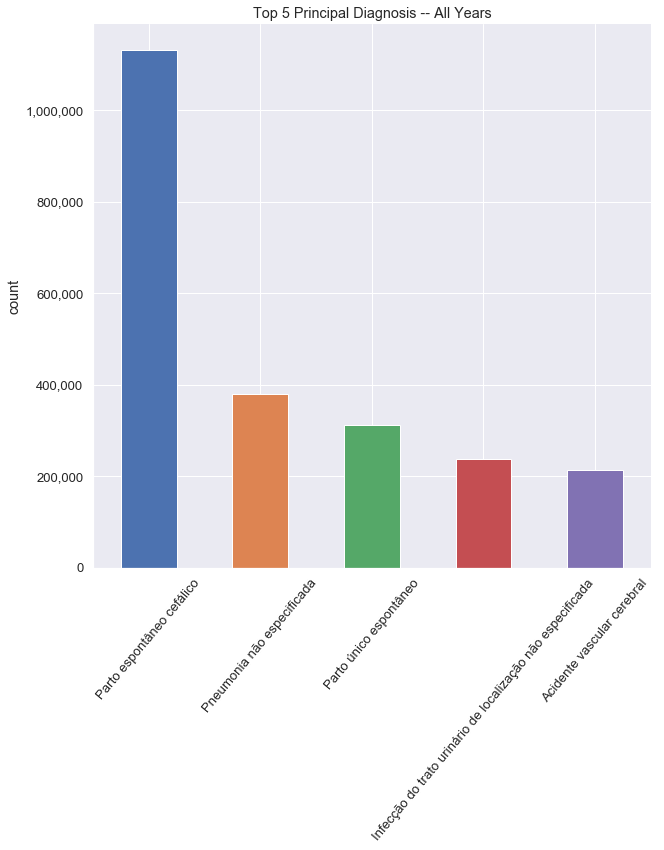

In [27]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- All Years', xlabel = '', ylabel = 'count')

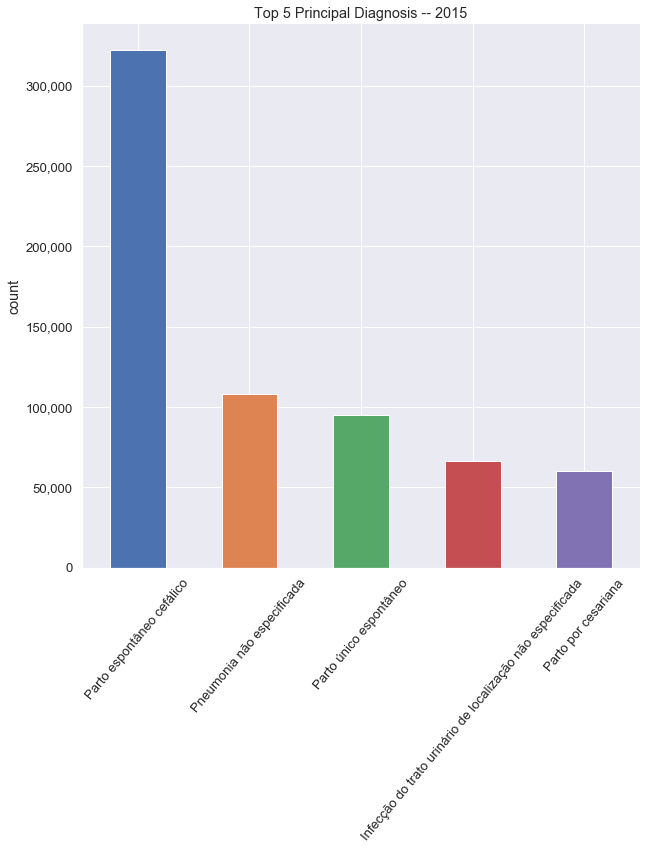

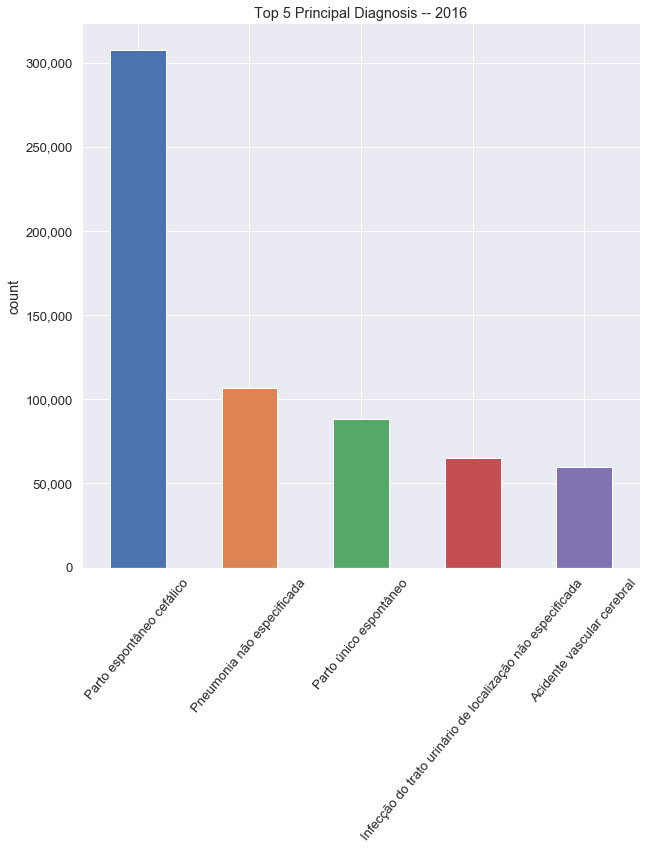

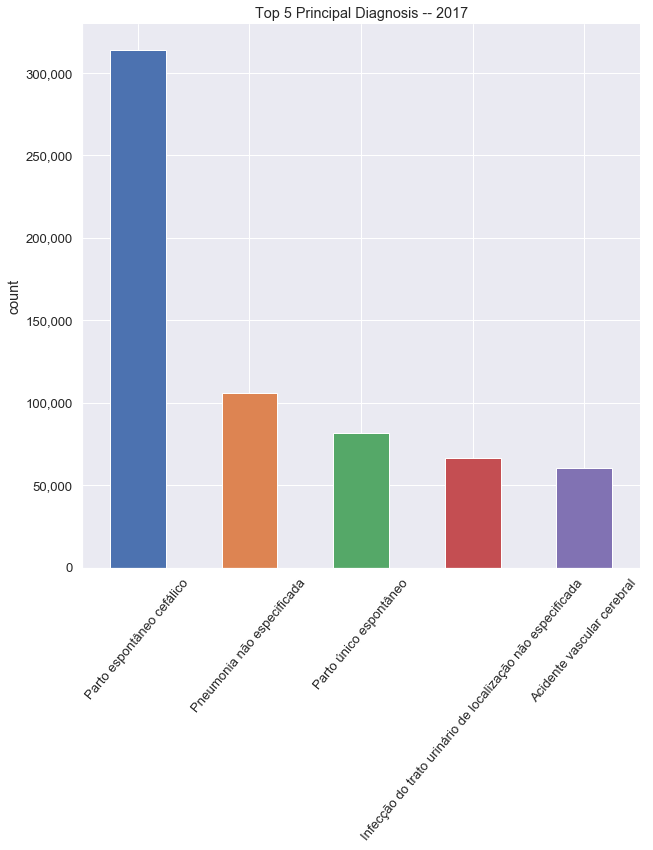

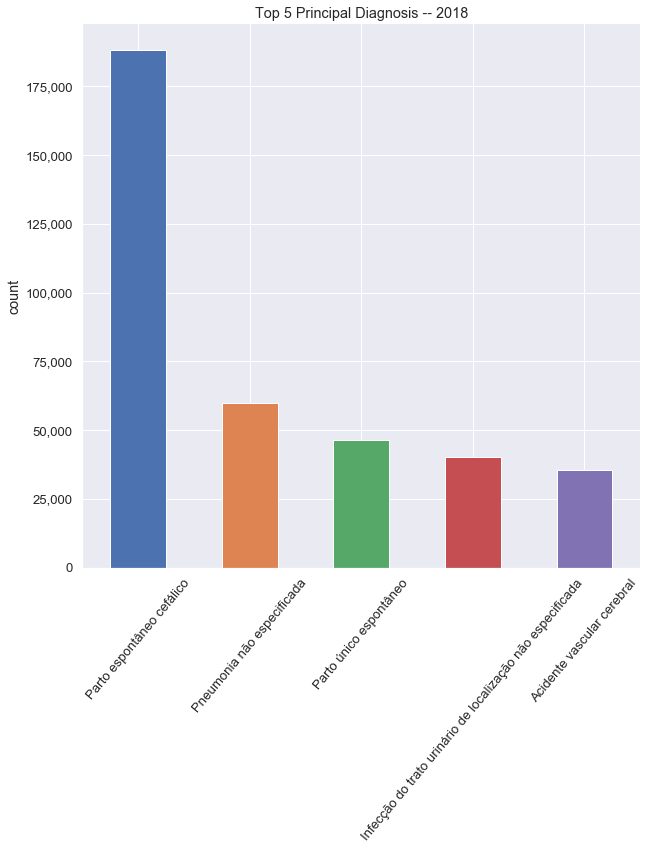

In [28]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2018', xlabel = '', ylabel = 'count')

In [29]:
# Create counts of principal diagnosis and plot distribution

diag_princ_count = pd.DataFrame(diag_CID10.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2015 = pd.DataFrame(diag_2015.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2016 = pd.DataFrame(diag_2016.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2017 = pd.DataFrame(diag_2017.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2018 = pd.DataFrame(diag_2018.DIAG_PRINC_DES.value_counts()).reset_index()

Text(0.5,0,'Log of Count')

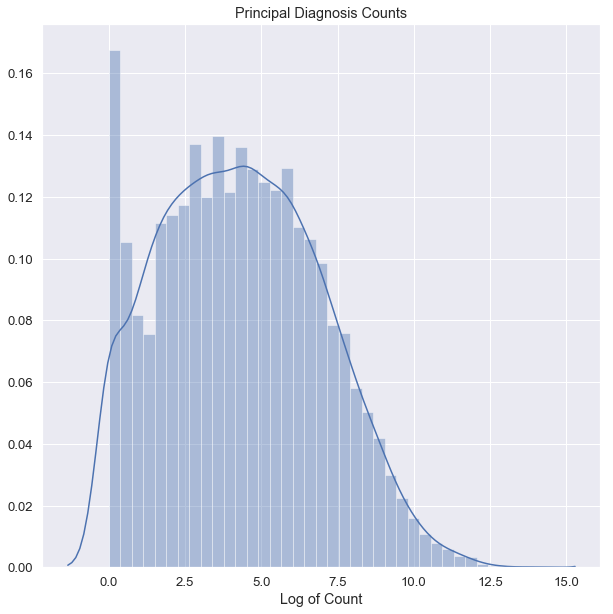

In [30]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(diag_princ_count['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts")

plt.xlabel('Log of Count')

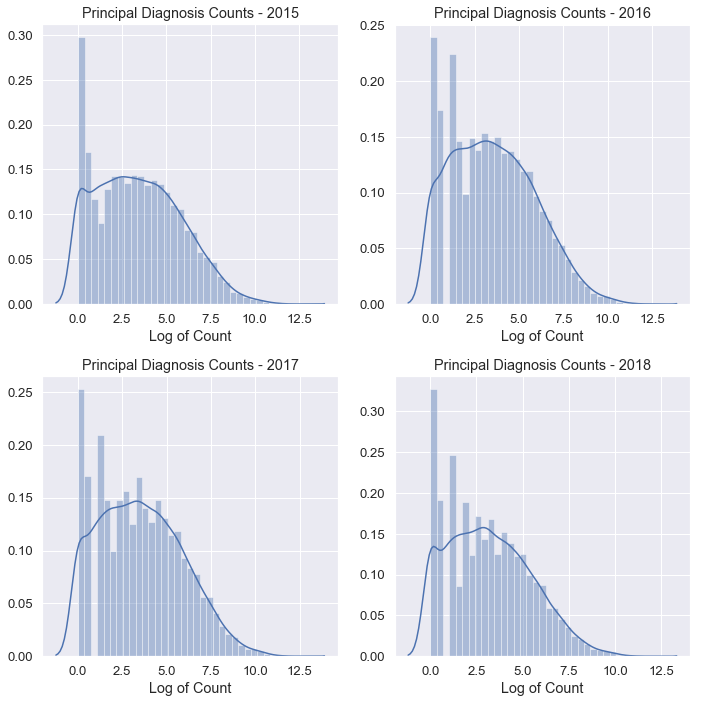

In [31]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(diag_princ_count_2015['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(diag_princ_count_2016['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(diag_princ_count_2017['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(diag_princ_count_2018['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout()

In [32]:
# Normality Tests

norm_dist_tests(df = diag_princ_count, col_name = 'DIAG_PRINC_DES')

D’Agostino and Pearson’s:  NormaltestResult(statistic=26646.577497145663, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=2718.14696608574, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=8721, minmax=(1, 1132240), mean=1905.1519321178764, variance=253632849.63872597, skewness=45.6575732472053, kurtosis=2982.339869593929)


In [33]:
# ECDF

x, y = ecdf(diag_princ_count['DIAG_PRINC_DES'])

x_theor, y_theor = theor_ecdf(df = diag_princ_count, col_name = 'DIAG_PRINC_DES', seed = 42)

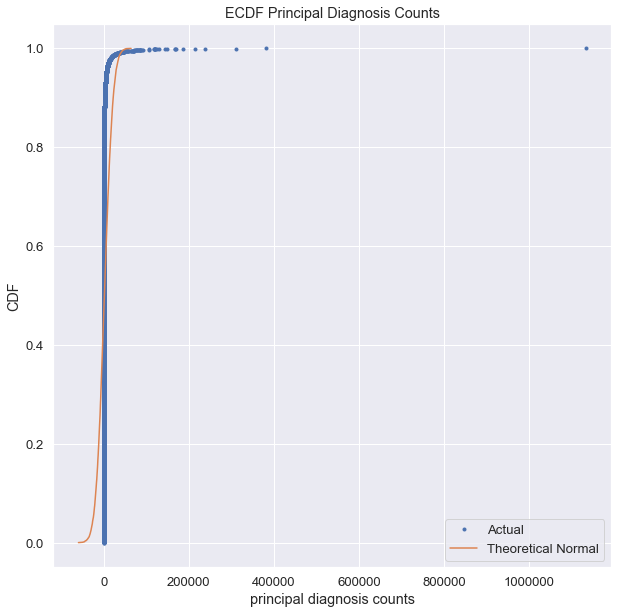

In [34]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Principal Diagnosis Counts")

plt.xlabel("principal diagnosis counts")

plt.ylabel('CDF')

plt.show()

In [35]:
# Replicates

%time

n_tries = 10000

diag_mean_replicates = bs_sample(diag_princ_count['DIAG_PRINC_DES'], np.mean, size = n_tries)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.3 µs


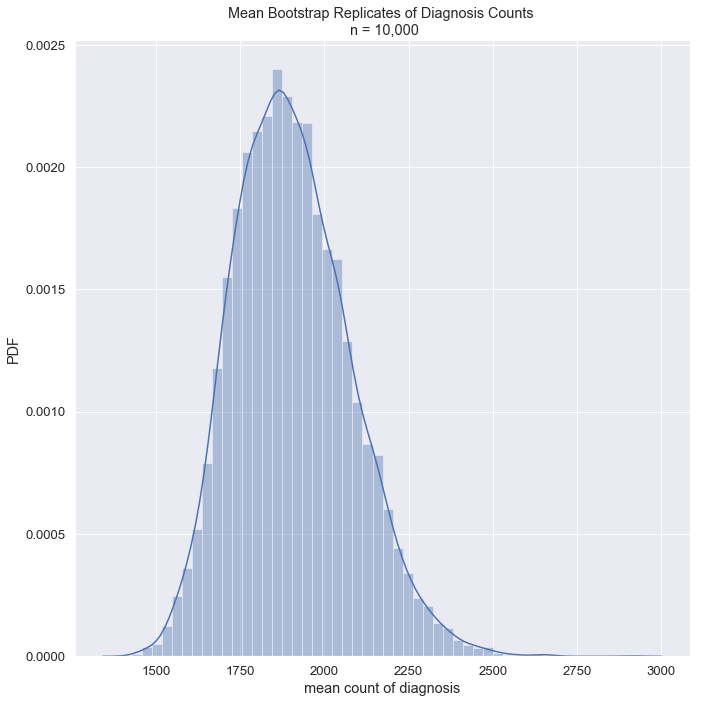

In [36]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis')

plt.title("Mean Bootstrap Replicates of Diagnosis Counts \n n = 10,000")

plt.tight_layout()

In [37]:
diag_count_mean = np.mean(diag_princ_count['DIAG_PRINC_DES'])

In [38]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_mean_replicates, 
              mean = diag_count_mean)

Bootstrap Mean Replicates 95% CI:  [1607.78629171 2273.44585483]
P-value of patient age mean replicates:  0.5309


In [39]:
# One-sided t-test

stats.ttest_1samp(diag_princ_count.DIAG_PRINC_DES, diag_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

> **Variable:** `Principal Diagnosis Chapter`

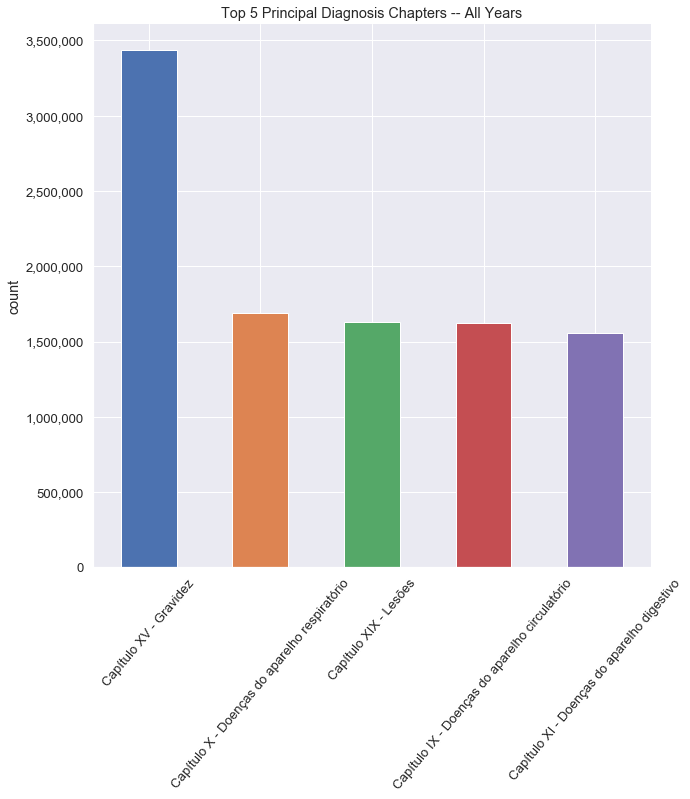

In [40]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- All Years', xlabel = '', ylabel = 'count')

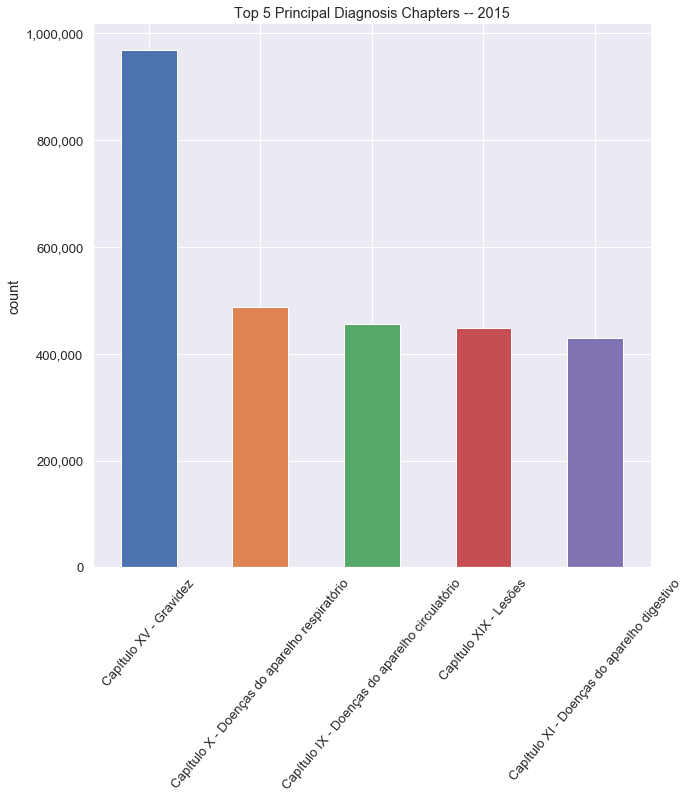

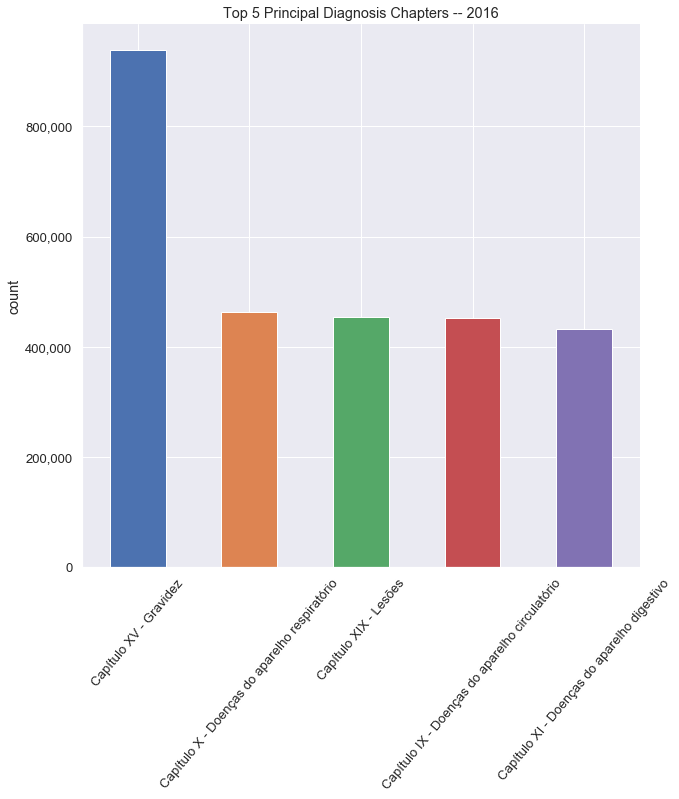

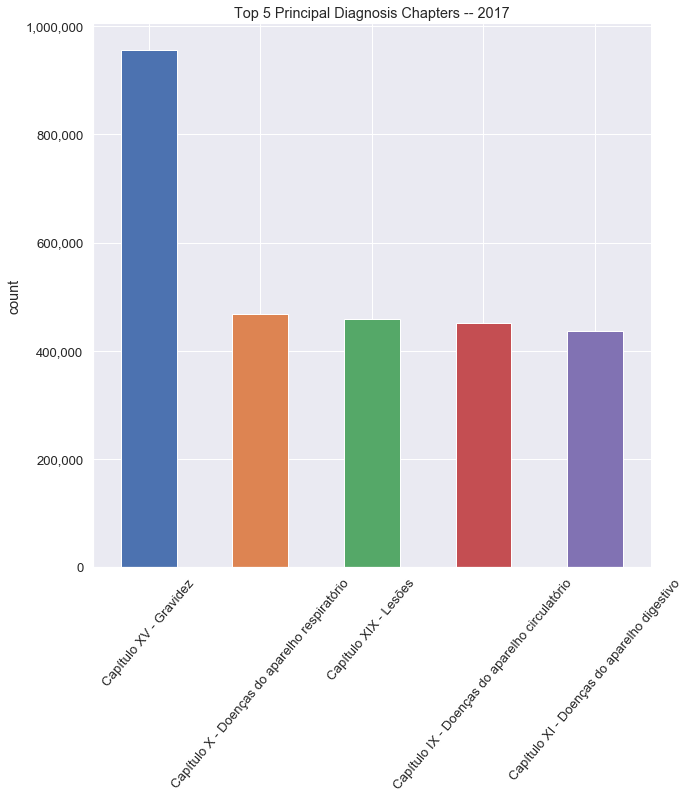

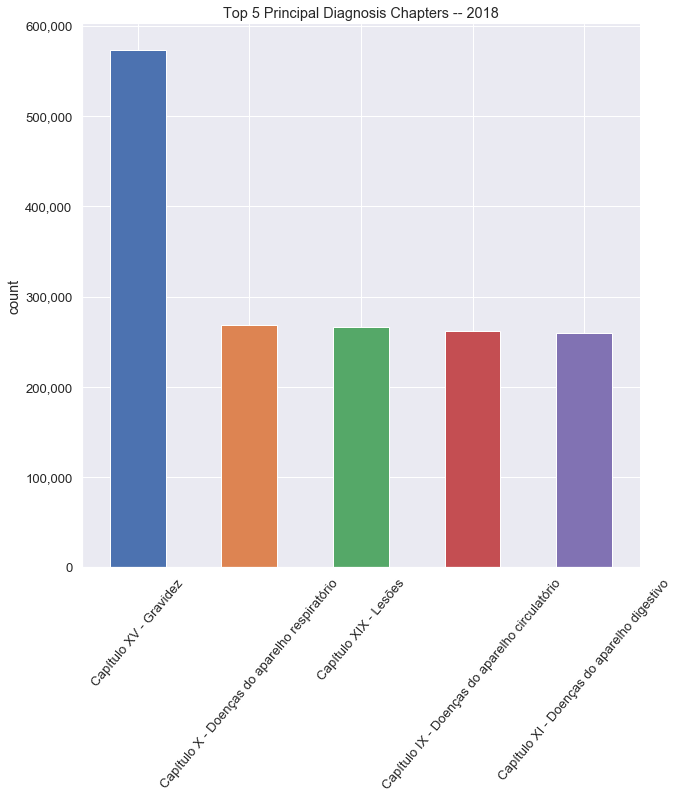

In [41]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2018', xlabel = '', ylabel = 'count')

In [42]:
# Create counts of principal diagnosis and plot distribution

diag_chap_count = pd.DataFrame(diag_CID10.DES_CAP.value_counts()).reset_index()

diag_chap_count_2015 = pd.DataFrame(diag_2015.DES_CAP.value_counts()).reset_index()

diag_chap_count_2016 = pd.DataFrame(diag_2016.DES_CAP.value_counts()).reset_index()

diag_chap_count_2017 = pd.DataFrame(diag_2017.DES_CAP.value_counts()).reset_index()

diag_chap_count_2018 = pd.DataFrame(diag_2018.DES_CAP.value_counts()).reset_index()

Text(0.5,0,'Log of Count')

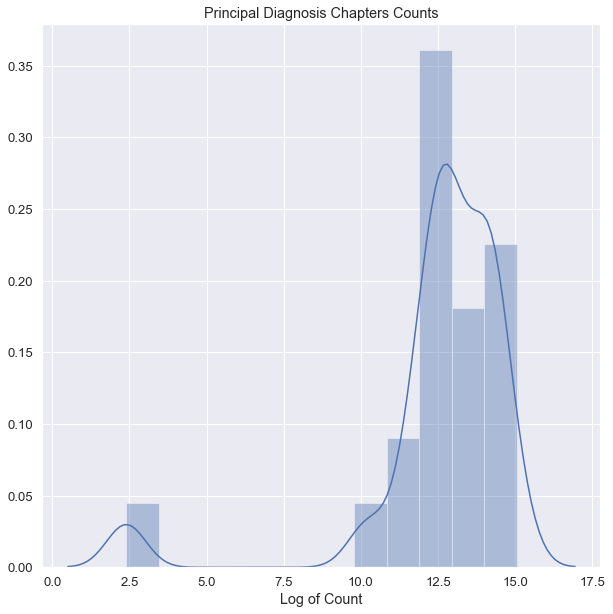

In [43]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(diag_chap_count['DES_CAP']))

plt.title("Principal Diagnosis Chapters Counts")

plt.xlabel('Log of Count')

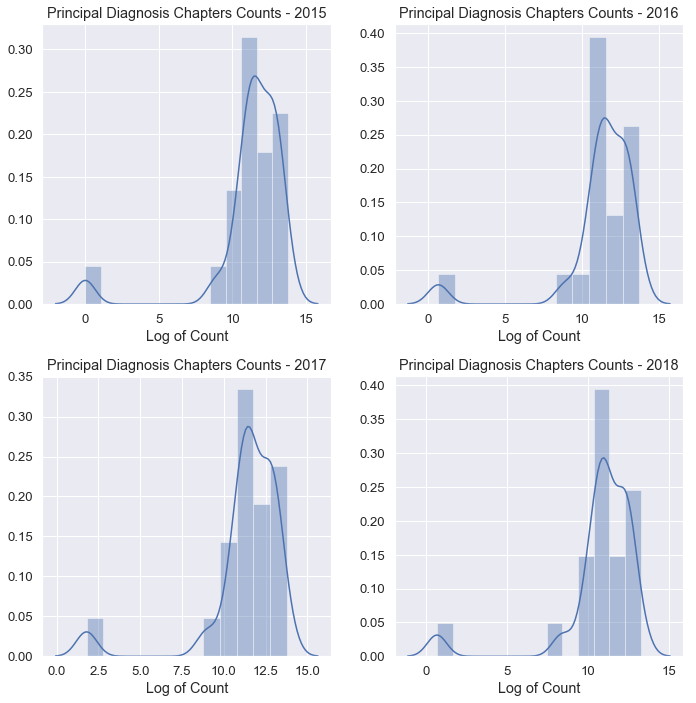

In [44]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(diag_chap_count_2015['DES_CAP']))

plt.title("Principal Diagnosis Chapters Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(diag_chap_count_2016['DES_CAP']))

plt.title("Principal Diagnosis Chapters Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(diag_chap_count_2017['DES_CAP']))

plt.title("Principal Diagnosis Chapters Counts - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(diag_chap_count_2018['DES_CAP']))

plt.title("Principal Diagnosis Chapters Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout()

In [45]:
# Normality Tests

norm_dist_tests(df = diag_chap_count, col_name = 'DES_CAP')

D’Agostino and Pearson’s:  NormaltestResult(statistic=15.09728067265722, pvalue=0.0005268259464695619)
Anderson-Darling:  AndersonResult(statistic=1.4327248712991327, critical_values=array([0.508, 0.579, 0.694, 0.81 , 0.963]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=21, minmax=(11, 3438854), mean=791182.380952381, variance=709205728798.2476, skewness=1.5882149903705567, kurtosis=2.5068688300113395)


In [46]:
# ECDF

x, y = ecdf(diag_chap_count['DES_CAP'])

x_theor, y_theor = theor_ecdf(df = diag_chap_count, col_name = 'DES_CAP', seed = 42)

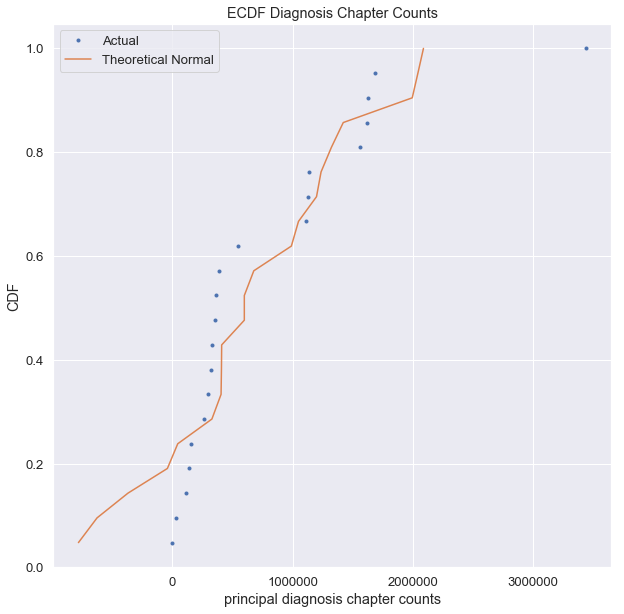

In [47]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Diagnosis Chapter Counts")

plt.xlabel("principal diagnosis chapter counts")

plt.ylabel('CDF')

plt.show()

In [48]:
# Replicates

%time

n_tries = 10000

diag_cap_mean_replicates = bs_sample(diag_chap_count['DES_CAP'], np.mean, size = n_tries)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


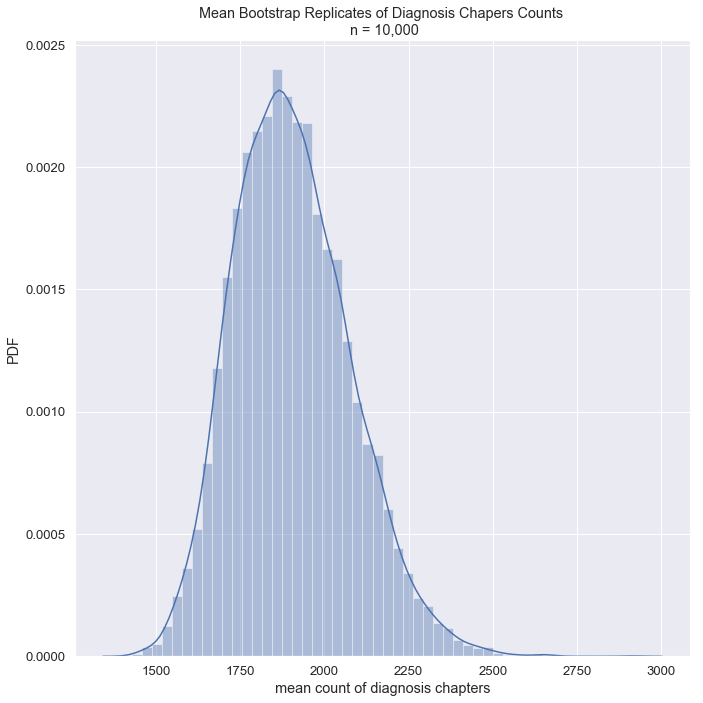

In [49]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis chapters')

plt.title("Mean Bootstrap Replicates of Diagnosis Chapers Counts \n n = 10,000")

plt.tight_layout()

In [50]:
diag_cap_count_mean = np.mean(diag_chap_count['DES_CAP'])

In [51]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_cap_mean_replicates, 
              mean = diag_cap_count_mean)

Bootstrap Mean Replicates 95% CI:  [ 467346.31666667 1163714.70357143]
P-value of patient age mean replicates:  0.5188


In [52]:
# One-sided t-test

stats.ttest_1samp(diag_chap_count.DES_CAP, diag_cap_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

> **Variable:** `Principal Diagnosis Group`

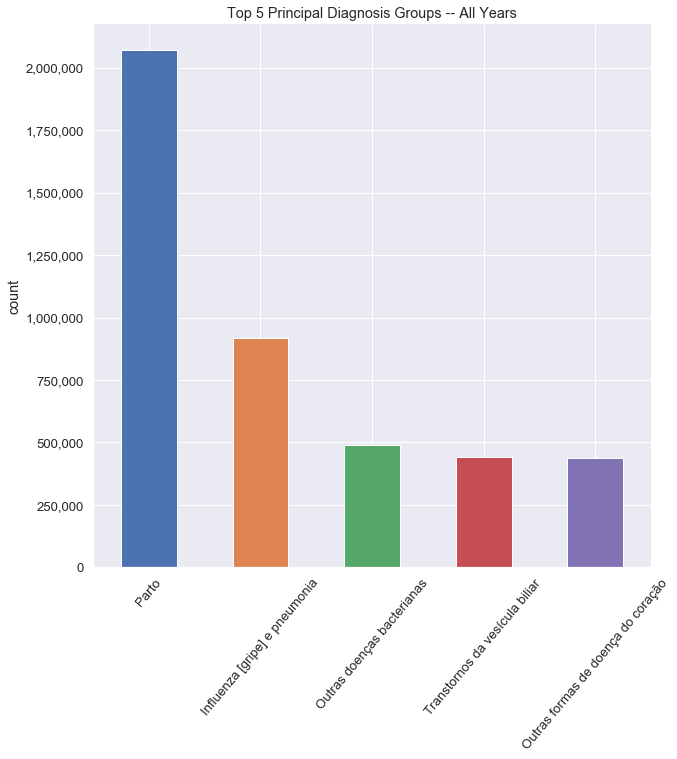

In [53]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- All Years', xlabel = '', ylabel = 'count')

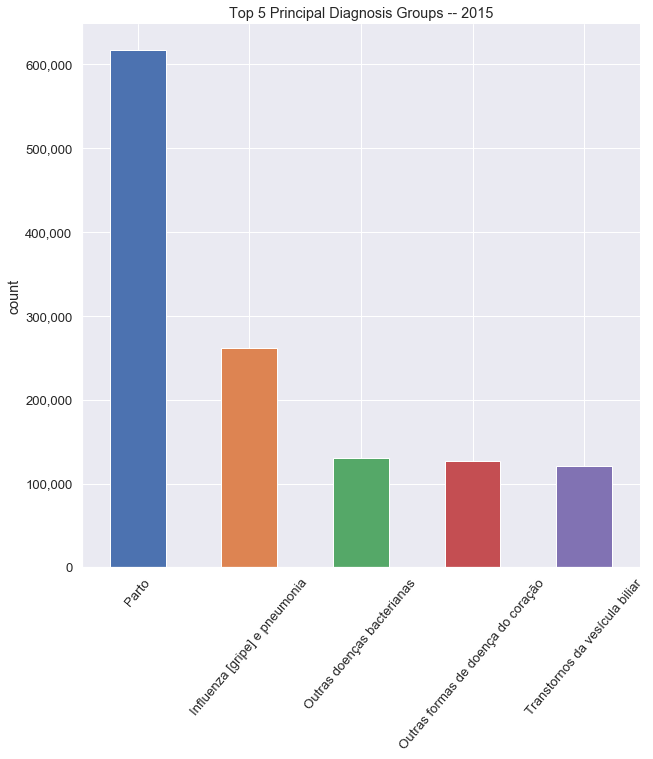

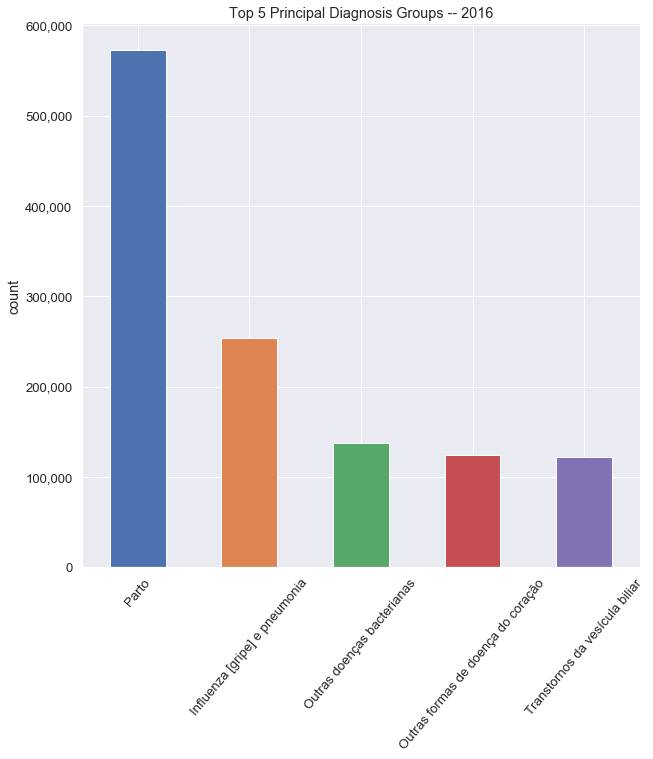

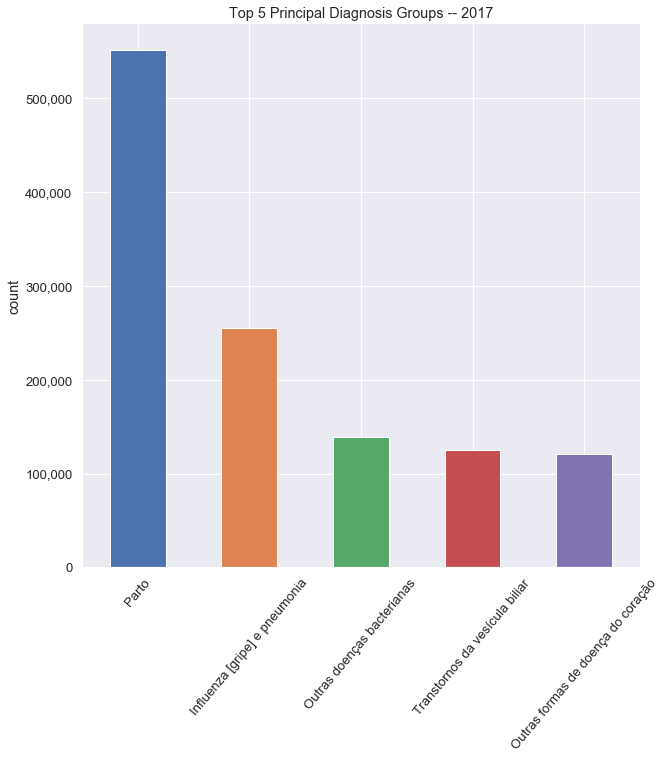

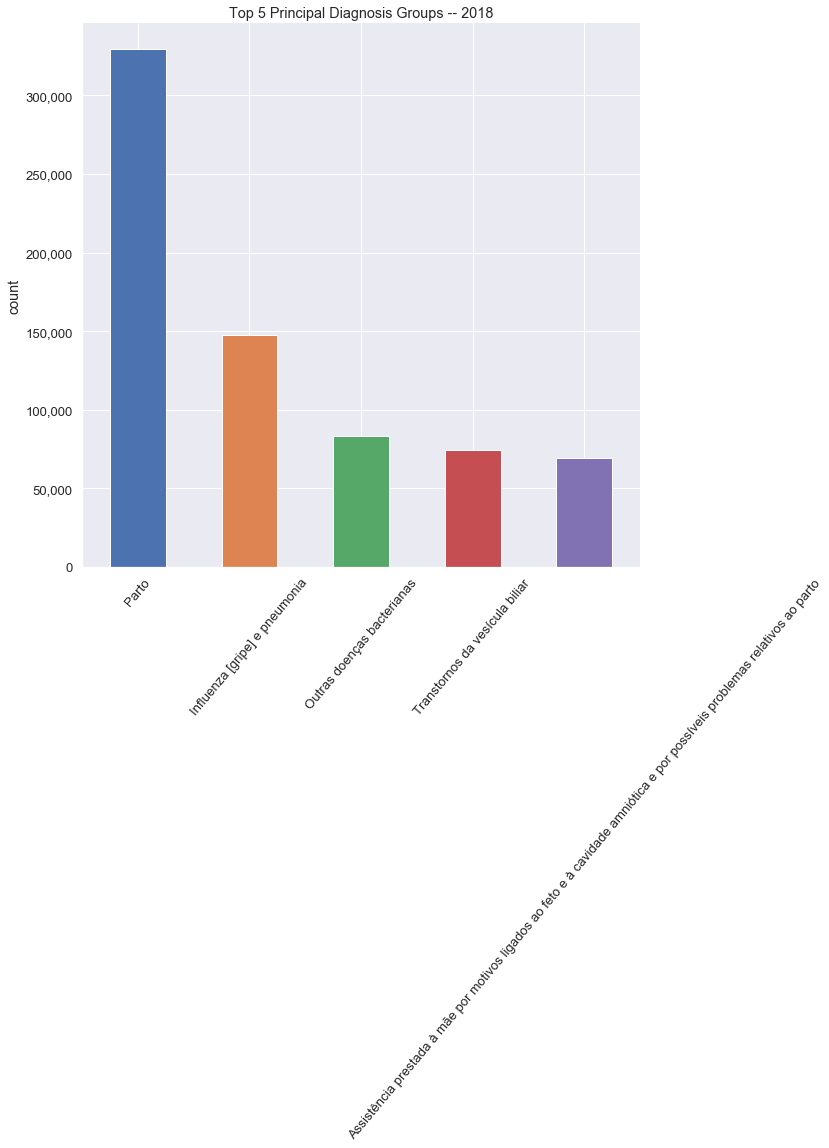

In [54]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2018', xlabel = '', ylabel = 'count')

In [55]:
# Create counts of principal diagnosis and plot distribution

diag_grp_count = pd.DataFrame(diag_CID10.DES_GRP.value_counts()).reset_index()

diag_grp_count_2015 = pd.DataFrame(diag_2015.DES_GRP.value_counts()).reset_index()

diag_grp_count_2016 = pd.DataFrame(diag_2016.DES_GRP.value_counts()).reset_index()

diag_grp_count_2017 = pd.DataFrame(diag_2017.DES_GRP.value_counts()).reset_index()

diag_grp_count_2018 = pd.DataFrame(diag_2018.DES_GRP.value_counts()).reset_index()

Text(0.5,0,'Log of Count')

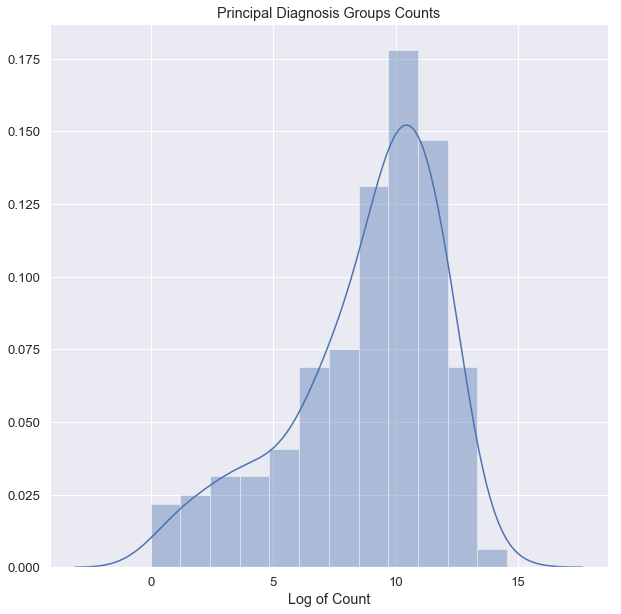

In [56]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(diag_grp_count['DES_GRP']))

plt.title("Principal Diagnosis Groups Counts")

plt.xlabel('Log of Count')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


OverflowError: cannot convert float infinity to integer

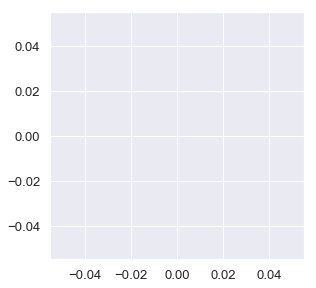

In [57]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(diag_grp_count_2015['DES_GRP']))

plt.title("Principal Diagnosis Group Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(diag_grp_count_2016['DES_GRP']))

plt.title("Principal Diagnosis Group Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(diag_grp_count_2017['DES_GRP']))

plt.title("Principal Diagnosis Group Counts - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(diag_grp_count_2018['DES_GRP']))

plt.title("Principal Diagnosis Group Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout()

In [58]:
# Normality Tests

norm_dist_tests(df = diag_grp_count, col_name = 'DES_GRP')

D’Agostino and Pearson’s:  NormaltestResult(statistic=429.30077429380265, pvalue=6.005114930836989e-94)
Anderson-Darling:  AndersonResult(statistic=44.31093938701372, critical_values=array([0.568, 0.646, 0.776, 0.905, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=264, minmax=(1, 2071585), mean=62912.193181818184, variance=25861691319.19068, skewness=8.350473598356123, kurtosis=93.72286067941431)


In [59]:
# ECDF

x, y = ecdf(diag_chap_count['DES_CAP'])

x_theor, y_theor = theor_ecdf(df = diag_grp_count, col_name = 'DES_GRP', seed = 42)

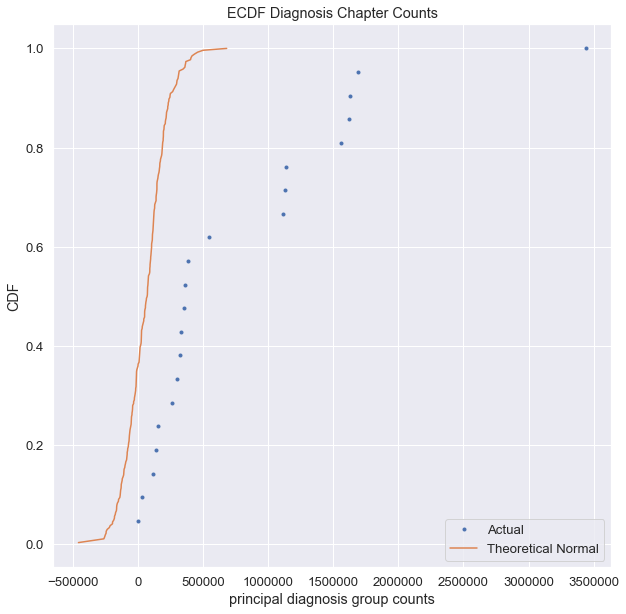

In [60]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Diagnosis Chapter Counts")

plt.xlabel("principal diagnosis group counts")

plt.ylabel('CDF')

plt.show()

In [61]:
# Replicates

%time

n_tries = 10000

diag_grp_mean_replicates = bs_sample(diag_grp_count['DES_GRP'], np.mean, size = n_tries)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


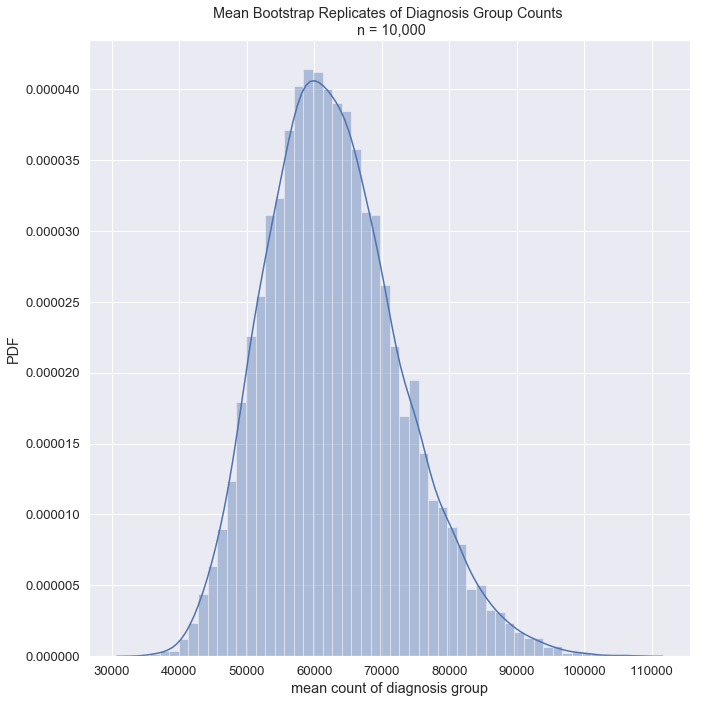

In [62]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_grp_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis group')

plt.title("Mean Bootstrap Replicates of Diagnosis Group Counts \n n = 10,000")

plt.tight_layout()

In [63]:
diag_grp_count_mean = np.mean(diag_grp_count['DES_GRP'])

In [64]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_grp_mean_replicates, 
              mean = diag_grp_count_mean)

Bootstrap Mean Replicates 95% CI:  [46009.5217803  84638.17301136]
P-value of patient age mean replicates:  0.5302


In [65]:
# One-sided t-test

stats.ttest_1samp(diag_grp_count.DES_GRP, diag_grp_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

> **Variable:** `Principal Diagnosis Category`

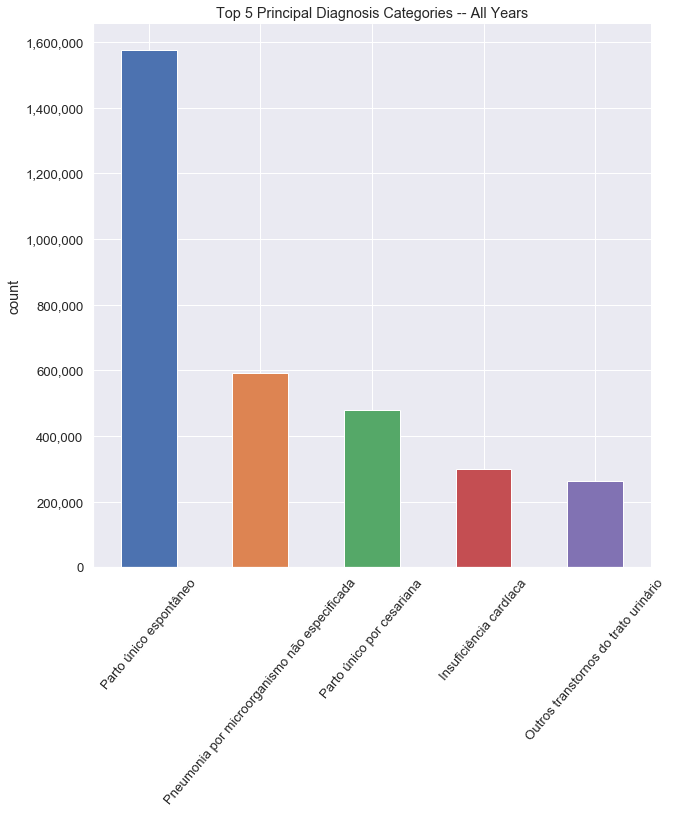

In [66]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- All Years', xlabel = '', ylabel = 'count')

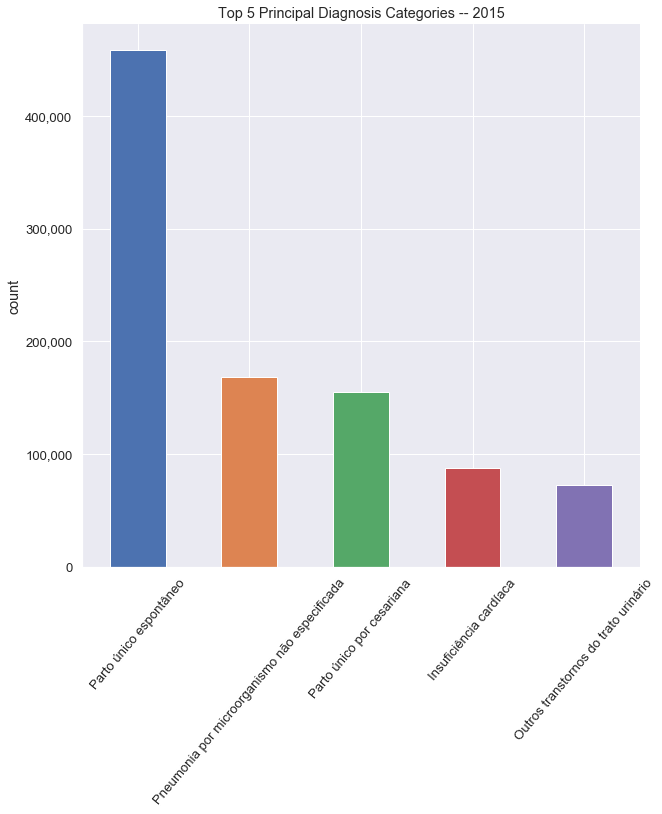

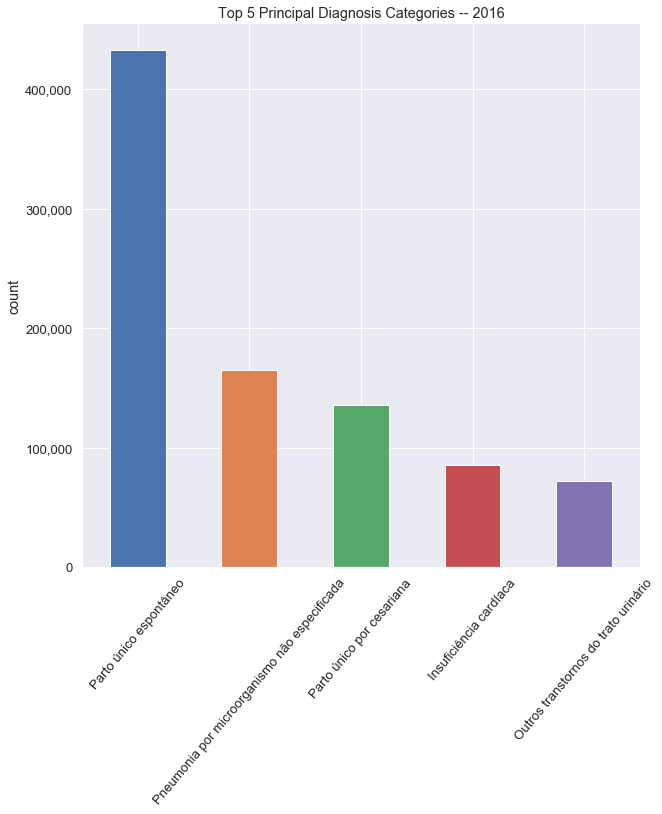

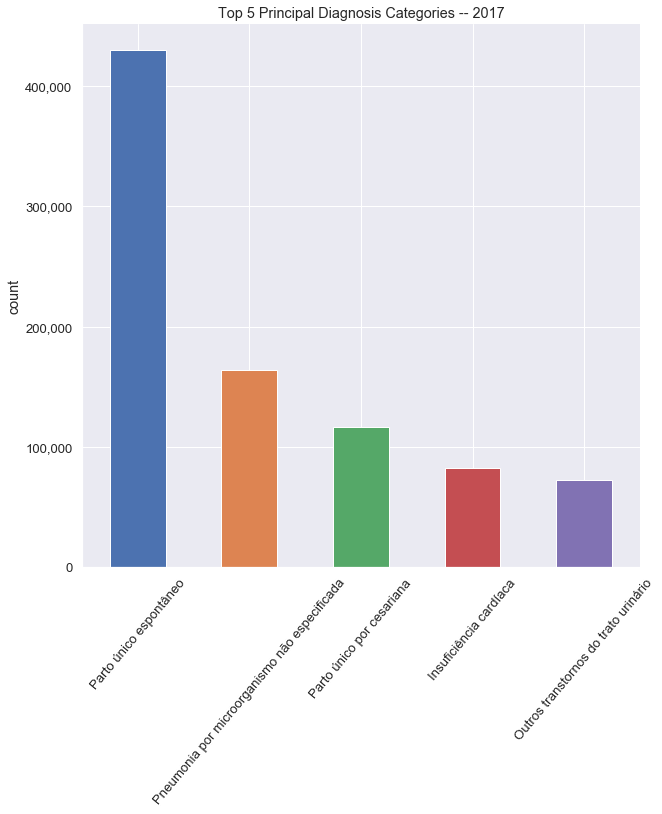

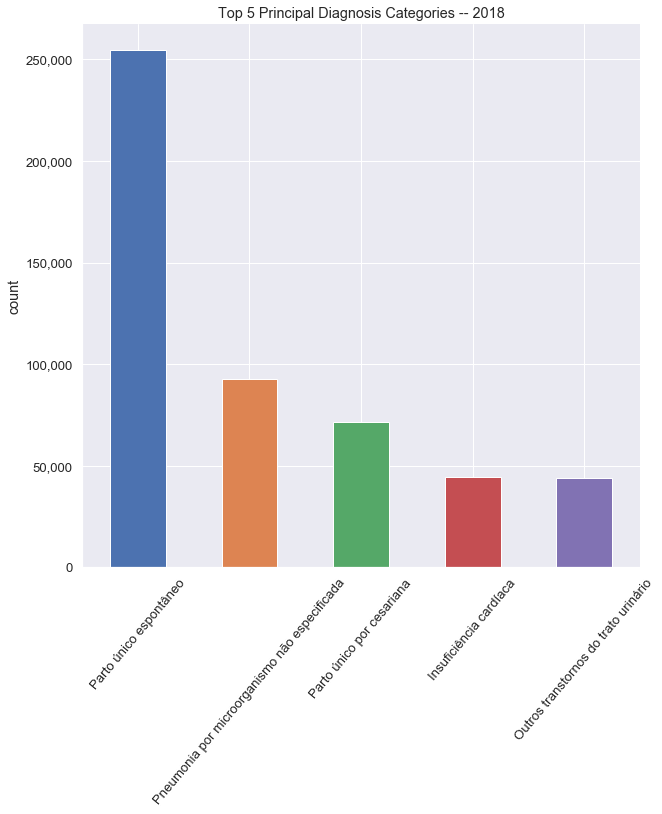

In [67]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2018', xlabel = '', ylabel = 'count')

In [68]:
# Create counts of principal diagnosis and plot distribution

diag_cat_count = pd.DataFrame(diag_CID10.DES_CAT.value_counts()).reset_index()

diag_cat_count_2015 = pd.DataFrame(diag_2015.DES_CAT.value_counts()).reset_index()

diag_cat_count_2016 = pd.DataFrame(diag_2016.DES_CAT.value_counts()).reset_index()

diag_cat_count_2017 = pd.DataFrame(diag_2017.DES_CAT.value_counts()).reset_index()

diag_cat_count_2018 = pd.DataFrame(diag_2018.DES_CAT.value_counts()).reset_index()

Text(0.5,0,'Log of Count')

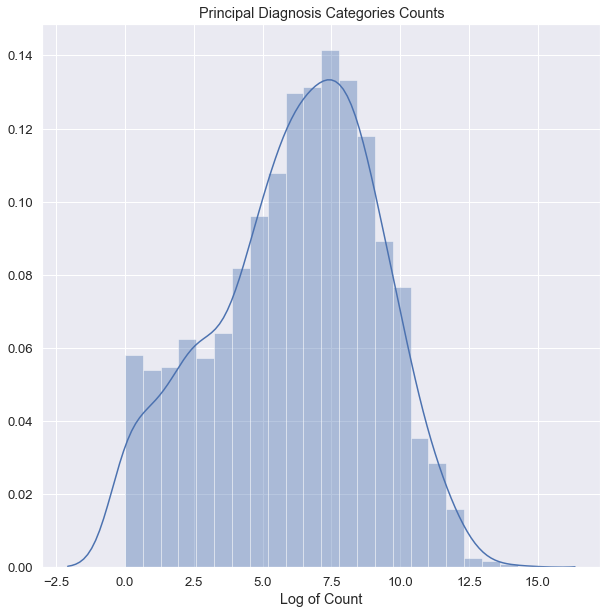

In [69]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(diag_cat_count['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts")

plt.xlabel('Log of Count')

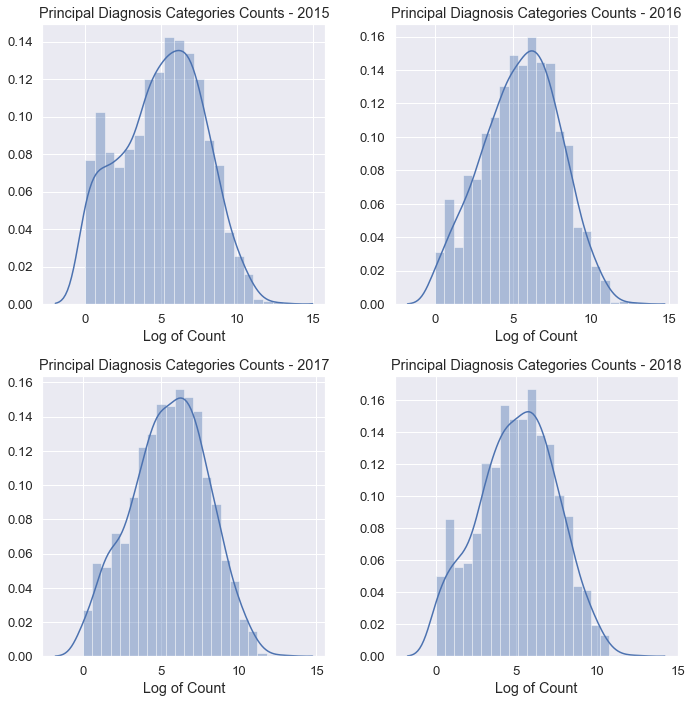

In [70]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(diag_cat_count_2015['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(diag_cat_count_2016['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(diag_cat_count_2017['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(diag_cat_count_2018['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout()

In [71]:
# Normality Tests

norm_dist_tests(df = diag_cat_count, col_name = 'DES_CAT')

D’Agostino and Pearson’s:  NormaltestResult(statistic=4304.849687451071, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=488.0443277291902, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=1829, minmax=(1, 1577070), mean=9084.106068890103, variance=2215999209.3880863, skewness=22.56990745283503, kurtosis=692.149205785309)


In [72]:
# ECDF

x, y = ecdf(diag_cat_count['DES_CAT'])

x_theor, y_theor = theor_ecdf(df = diag_cat_count, col_name = 'DES_CAT', seed = 42)

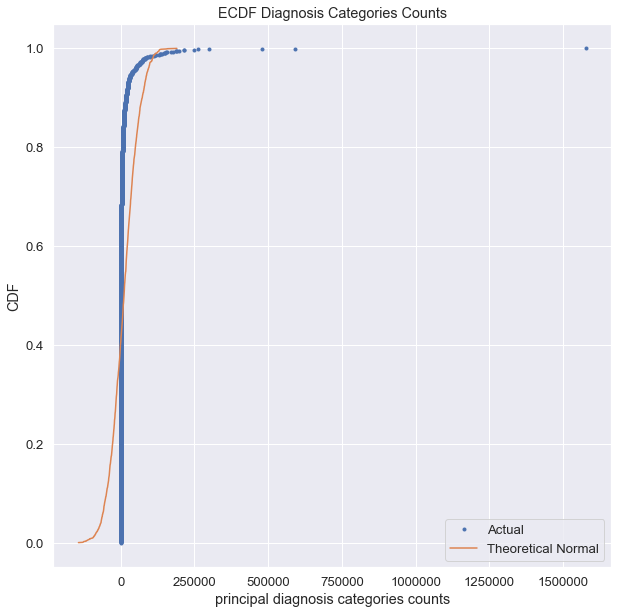

In [73]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Diagnosis Categories Counts")

plt.xlabel("principal diagnosis categories counts")

plt.ylabel('CDF')

plt.show()

In [74]:
# Replicates

%time

n_tries = 10000

diag_cat_mean_replicates = bs_sample(diag_cat_count['DES_CAT'], np.mean, size = n_tries)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


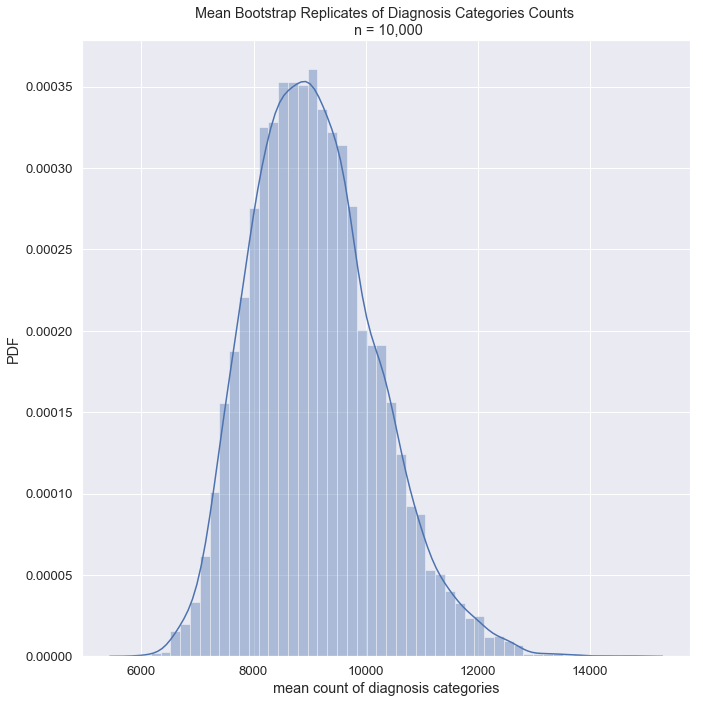

In [75]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_cat_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis categories')

plt.title("Mean Bootstrap Replicates of Diagnosis Categories Counts \n n = 10,000")

plt.tight_layout()

In [78]:
diag_cat_count_mean = np.mean(diag_cat_count['DES_CAT'])

In [79]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_cat_mean_replicates, 
              mean = diag_cat_count_mean)

Bootstrap Mean Replicates 95% CI:  [ 7232.28834062 11541.97352378]
P-value of patient age mean replicates:  0.5317


In [80]:
# One-sided t-test

stats.ttest_1samp(diag_cat_count.DES_CAT, diag_cat_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## Export Cleaned Diagnosis Data

> **The numerical categorical values are the ones that will be used in the model**

In [81]:
diag_CID10.to_csv('AIH_sample_diag.csv', index = False, 
                  na_rep= 'NaN', encoding='utf-8', 
                  chunksize = 50000)